## Vincent T. Cooper

- Loads final outputs (pre bcgen) and inspects how using 
  the Ice 6G_C at 21k (Pettier et al, 
  https://www.atmosp.physics.utoronto.ca/~peltier/data.php) mask
- Will need to run bcgen utility again on the adjusted dataset 
  because the new SIC values will also affect the SSTs

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import pandas as pd
import seaborn as sns
import warnings
    
mpl.rcParams['figure.figsize'] = 8, 4
mpl.rcParams['font.size'] = 12

cmap_nan = copy.copy(plt.cm.bwr)
cmap_nan.set_bad('k')

## Load Data

In [25]:
##### Load original data from U Arizona team for reference only #####

## Load LGM output
ddir = '/home/disk/atmos/vcooper/work/p2c2/lgm/'
dfile = 'lgmDA_hol_SST_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).sst,
                   tempds.set_coords(['lat','lon','month']).sst_std])
holo_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
holo_sst_climo['mask'] = xr.where(~np.isnan(holo_sst_climo.sst.isel(nmonth=0)), 1, 0)

dfile = 'lgmDA_lgm_SST_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).sst,
                   tempds.set_coords(['lat','lon','month']).sst_std])
lgm_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
lgm_sst_climo['mask'] = xr.where(~np.isnan(lgm_sst_climo.sst.isel(nmonth=0)), 1, 0)

## Load ICEFRAC
dfile = 'lgmDA_hol_ICEFRAC_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).icefrac,
                   tempds.set_coords(['lat','lon','month']).icefrac_std])
holo_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
holo_ice_climo['mask'] = xr.where(~np.isnan(holo_ice_climo.icefrac.isel(nmonth=0)), 1, 0)

dfile = 'lgmDA_lgm_ICEFRAC_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).icefrac,
                   tempds.set_coords(['lat','lon','month']).icefrac_std])
lgm_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
lgm_ice_climo['mask'] = xr.where(~np.isnan(lgm_ice_climo.icefrac.isel(nmonth=0)), 1, 0)

The UW-infilled files before bcgen from prep_cam_bc. Then the files copied over from cheyenne after having run bcgen.

In [12]:
fpath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
lgm_before_bcgen = xr.open_dataset(fpath + 'lgm_bc_final_prediddle.nc')

# savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
# fname = 'holo_bc_final_prediddle.nc'

In [57]:
# temp = lgm_before_bcgen.rename_dims({'lat':'nj','lon':'ni'})
# temp = temp.rename_vars({'lon':'longitude','lat':'latitude'})

In [58]:
# temp.ice_cov_prediddle[0].to_netcdf('/home/disk/sipn/vcooper/nobackup/lgm/peltier_lgm-mask/o.nc')

Now load the Ice 6G_C 21k LGM data

In [24]:
ice6g = xr.open_dataset('/home/disk/sipn/vcooper/nobackup/lgm/peltier_lgm-mask/' + 'I6_C.VM5a_1deg.21.nc')

In [88]:
.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

## Infilled data

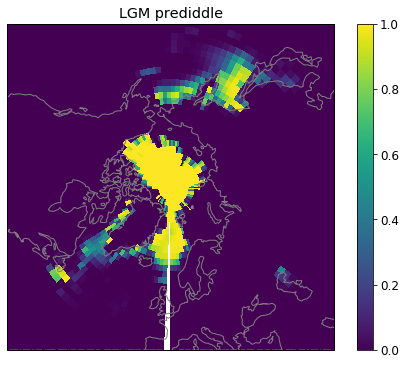

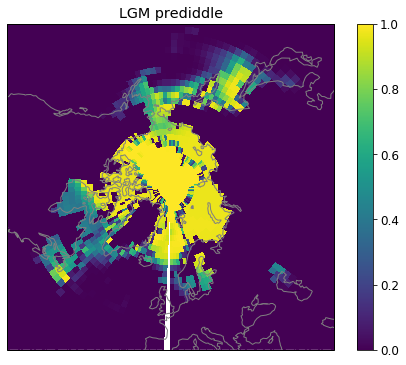

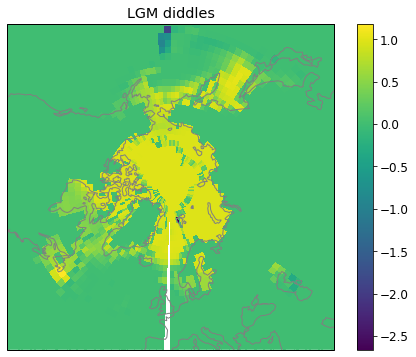

In [89]:
## before infilling

ds = lgm_ice_climo.icefrac[0]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM prediddle')
plt.show()

## before bcgen

ds = lgm_cambc.ice_cov_prediddle[0]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM prediddle')
plt.show()

## after bcgen

ds = lgm_cambc.ice_cov[0]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM diddles')
plt.show()

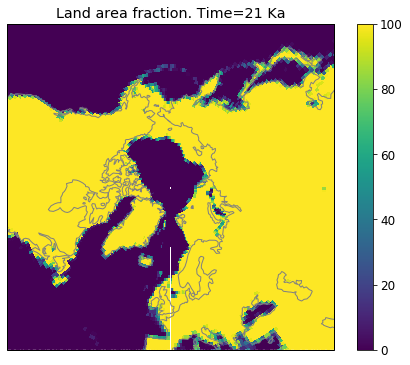

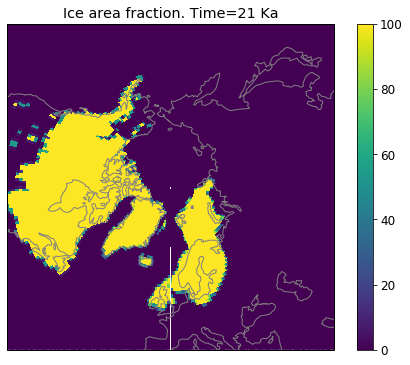

In [23]:
## land area

ds = ice6g.sftlf
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title(ds.long_name)
plt.show()

## ice area
ds = ice6g.sftgif
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title(ds.long_name)
plt.show()

## ice area
ds = ice6g.sftgif
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title(ds.long_name)
plt.show()

## Regrid the ice area onto the cam grid

In [67]:
%%time
## SST (icefrac is already on 1.9x2.5 grid)
# amip2000['mask'] = xr.where(~np.isnan(amip2000.SST_cpl[0]),1,0) ## dummy mask
newgrid = lgm_cambc.ice_cov_prediddle[0] # desired grid
data_for_regridding = ice6g
data_for_regridding['mask'] = xr.where(~np.isnan(data_for_regridding.sftlf),1,0)

regridder = xe.Regridder(data_for_regridding, newgrid,
                         method='bilinear',
                         periodic=True,
#                          extrap_method='inverse_dist',extrap_num_src_pnts=64,
#                          filename='bilinear_lgm_to_holo_per_extrapID64.nc',
                         reuse_weights=False)

ice6g_regrid = regridder(data_for_regridding)

# regridder

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


CPU times: user 1.84 s, sys: 65 ms, total: 1.91 s
Wall time: 2.15 s


/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/frontend.py:567: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


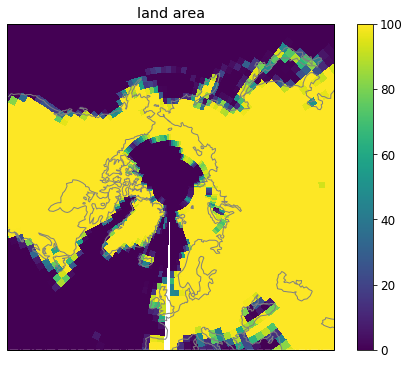

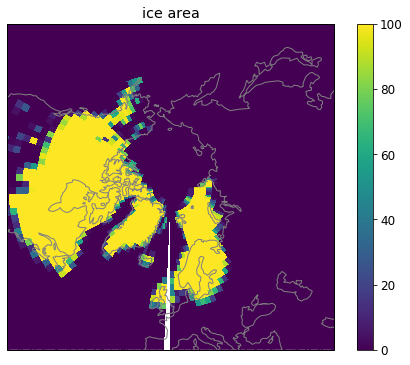

In [75]:
## land area

ds = ice6g_regrid.sftlf
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('land area')
plt.show()

## ice area
ds = ice6g_regrid.sftgif
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('ice area')
plt.show()

## make adjusted dataset
set minimum sea ice fraction to be the ice area fraction from ice6g

In [80]:
cambc_ice6g_adj = xr.where(lgm_cambc.ice_cov_prediddle*100 < ice6g_regrid.sftgif, 
                           ice6g_regrid.sftgif/100, lgm_cambc.ice_cov_prediddle)

# Comparison before and after

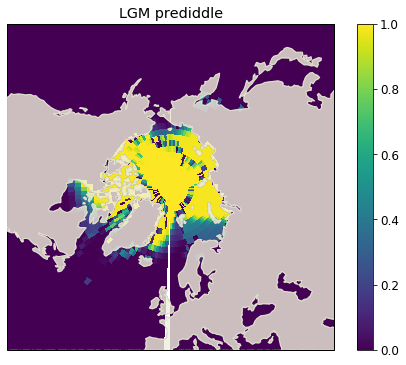

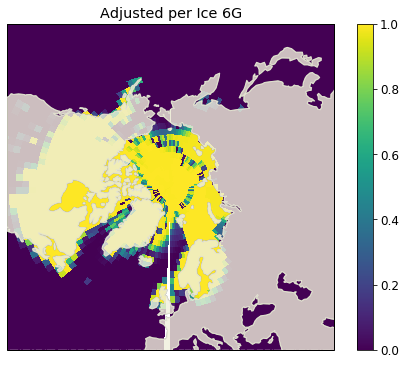

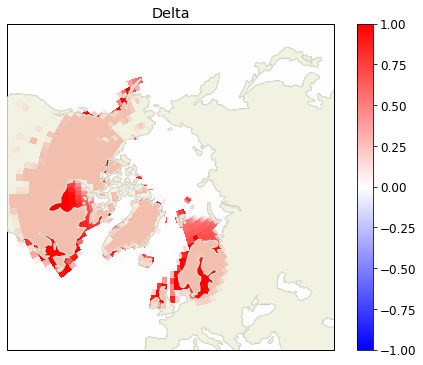

In [94]:
## before bcgen
isel_m = 8

ds = lgm_cambc.ice_cov_prediddle[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM prediddle')
plt.show()


## adjusted per ice6g

ds = cambc_ice6g_adj[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('Adjusted per Ice 6G')
plt.show()


## Delta

ds = cambc_ice6g_adj[isel_m] - lgm_cambc.ice_cov_prediddle[isel_m]
cmap_set = 'bwr'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,vmin=-1,vmax=1,alpha=1)
plt.colorbar()
plt.title('Delta')
plt.show()